In [35]:
# Import all necessary libraries and functions.
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
import seaborn as sns

### Funções úteis.

In [28]:
def plotSamples(x1,x2,y,filename):
    '''Plot the samples.'''
    idx0 = np.argwhere(y == 0)
    idx1 = np.argwhere(y == 1)

    plt.plot(x1[idx0], x2[idx0], '.', label='Class 0')
    plt.plot(x1[idx1], x2[idx1], 'rx', label='Class 1')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.legend()
    plt.grid()
    plt.savefig(filename, dpi=600)
    plt.show()
    
def plotDecisionBoundary(clf,x1,x2,filename):
    '''Plot the decision boundary. 
       For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].'''
    
    x_min, x_max = x1.min() - .5, x1.max() + .5
    y_min, y_max = x2.min() - .5, x2.max() + .5
    h = 250
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))

    zz = np.zeros((xx.shape))
    for i in range(0, len(xx)):
        for j in range(0, len(yy)):
            aux = clf.predict_proba(np.c_[xx[i,j], yy[i,j]])
            zz[i,j] = aux[0,1]

    plt.figure(figsize=(7,7))
    ax = plt.subplot(1, 1, 1, projection='3d')
    ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    # Add a color bar which maps values to colors.
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$y$',fontsize=14)
    plt.grid()
    plt.savefig(filename, dpi=600)
    plt.show()

### Função lógica "E" ruidosa

In [3]:
# Number of examples.
N = 10000

# Reset PN sequence generator.
seed = 4
np.random.seed(seed)

# Attributes.
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

# Noise.
w1 = 0.1*np.random.randn(N,)
w2 = 0.1*np.random.randn(N,)

# AND labels.
y = x1 & x2

# Noisy attributes.
x1 = x1 + w1
x2 = x2 + w2

X = np.c_[x1, x2]

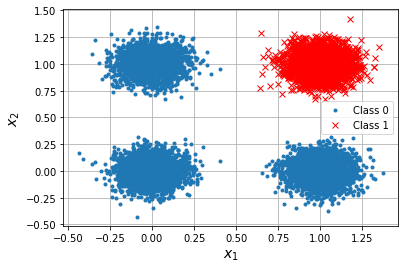

In [4]:
plotSamples(x1,x2,y,'and.png')

### Treinando a rede neural.

Usaremos um objeto da classe `MLPClassifier` da biblioteca scikit-learn para encontrar uma função discriminante que separe estas classes.

A classe `MLPClassifier` implementa uma rede neural multi-layer perceptron para **tarefas de classificação**, ou seja, ela terá um **número de neurônios na camada de saída igual ao número de classes do problema** e usa a **função `softmax` como ativação dos neurônios da camada de saída**.

A documentação da classe pode ser encontrada em:
+ https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Os parâmetros 

+ `hidden_layer_sizes` define o número de nós em cada camada escondida.
+ `activation` define a função de ativação dos nós das camadas escondidas.
+ `solver` define o otimizador. Outras opções são `adam` e `sgd, por exemplo.`

Como a função AND é linearmente separável (ver figura acima), para classificar esta função, usaremos uma rede MLP com 0 camadas escondidas e apenas um neurônio na camada de saída.

Total: 1 nó.

In [23]:
clf = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='lbfgs', random_state=seed)

clf.fit(X, y)

y_pred = clf.predict(X)
        
acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  0.511


In [24]:
print('Output coeff shape: ', clf.coefs_[0].shape)
print('n_layers: ', clf.n_layers_)
print('n_iter: ', clf.n_iter_)

Output coeff shape:  (2, 1)
n_layers:  2
n_iter:  3


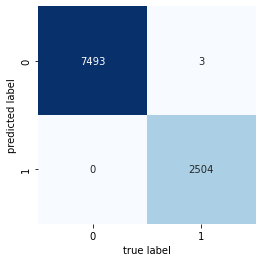

In [7]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(2), yticklabels=range(2), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

Um nó aproxima uma função de limiar suave.

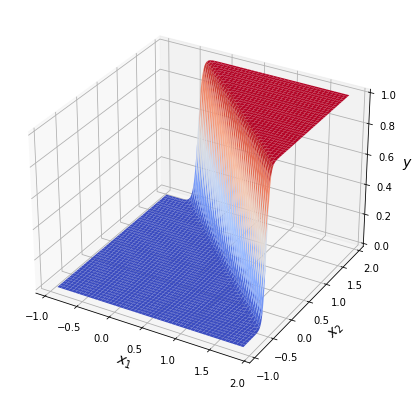

In [8]:
plotDecisionBoundary(clf,x1,x2,'mlp1.png')

### Função lógica XOR

In [9]:
# Number of examples.
N = 10000

# Reset PN sequence generator.
seed = 4
np.random.seed(seed)

# Attributes.
x1 = np.random.randint(0,2,N)
x2 = np.random.randint(0,2,N)

# Noise.
w1 = 0.1*np.random.randn(N,)
w2 = 0.1*np.random.randn(N,)

# XOR labels.
y = x1 ^ x2

# Noisy attributes.
x1 = x1 + w1
x2 = x2 + w2

X = np.c_[x1,x2]

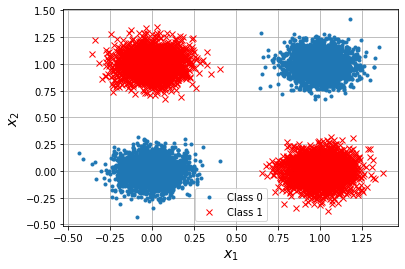

In [10]:
plotSamples(x1,x2,y,'xor.png')

### Treinando a rede neural.

Como a função XOR não é linearmente separável, para classificá-la, usaremos uma rede MLP (instância da classe `MLPClassifier`) com 1 camada escondida com 2 nós e apenas um neurônio na camada de saída.

Total: 3 nós.

In [11]:
clf1 = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', random_state=seed)

clf1.fit(X, y)

y_pred = clf1.predict(X)
        
acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  0.9993


In [12]:
print('Hidden coeff shape: ', clf1.coefs_[0].shape)
print('Output coeff shape: ', clf1.coefs_[1].shape)
print('n_layers: ', clf1.n_layers_)
print('n_iter: ', clf1.n_iter_)

Hidden coeff shape:  (2, 2)
Output coeff shape:  (2, 1)
n_layers:  3
n_iter:  27


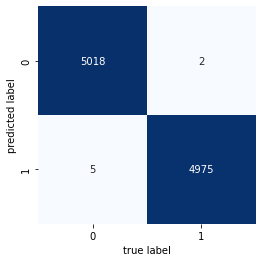

In [13]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(2), yticklabels=range(2), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

Combinando duas funções de limiar suave com direções opostas, podemos obter uma função em formato de onda.

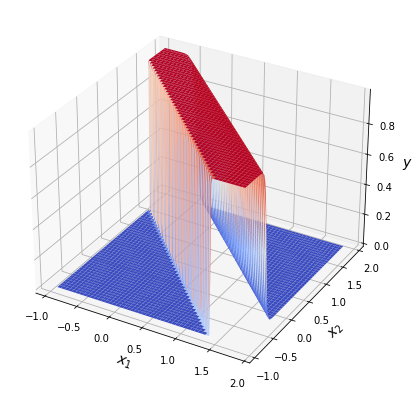

In [14]:
plotDecisionBoundary(clf1,x1,x2,'mlp21.png')

### Círculos concêntricos

In [15]:
# Reset PN sequence generator.
seed = 0
np.random.seed(seed)

X, y = make_circles(n_samples=1000, random_state=42, noise=0.1, factor=0.2)

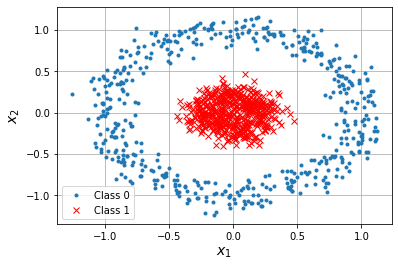

In [16]:
plotSamples(X[:,0],X[:,1],y,'concentriccircles.png')

### Treinando a rede neural.

Para classificar os círculos concêntricos, usaremos uma rede MLP com 1 camada escondida com 4 nós e apenas um neurônio na camada de saída.

Total: 5 nós.

In [17]:
clf2 = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', max_iter=1000, random_state=seed)

clf2.fit(X, y)

y_pred = clf2.predict(X)
        
acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  1.0


In [18]:
print('Hidden coeff shape: ', clf2.coefs_[0].shape)
print('Output coeff shape: ', clf2.coefs_[1].shape)
print('n_layers: ', clf2.n_layers_)
print('n_iter: ', clf2.n_iter_)

Hidden coeff shape:  (2, 4)
Output coeff shape:  (4, 1)
n_layers:  3
n_iter:  68


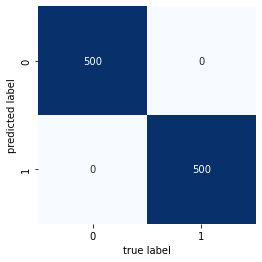

In [19]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(2), yticklabels=range(2), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

Combinando duas ondas perpendiculares, nós obtemos uma função em formato cilíndrico.

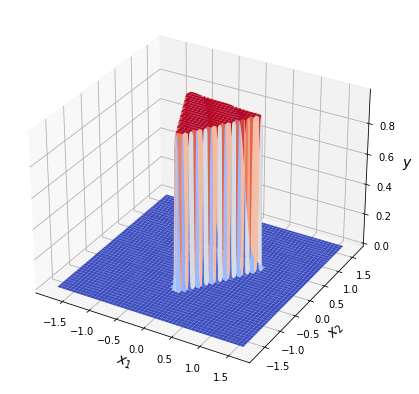

In [20]:
plotDecisionBoundary(clf2,X[:,0],X[:,1],'mlpcc.png')

### Duas luas

In [33]:
# Reset PN sequence generator.
seed = 0
np.random.seed(seed)

N = 10000

X, y = make_moons(n_samples=N, noise=0.05, random_state=42)

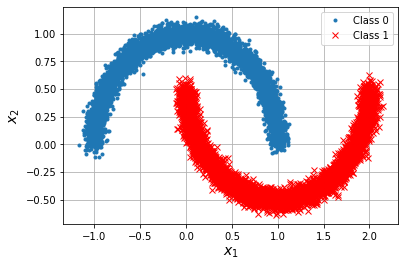

In [34]:
plotSamples(X[:,0],X[:,1],y,'two_moons.png')

### Treinando a rede neural.

Para classificar as duas luas, usaremos validação cruzada para encontrar o número ideal de nós na camada escondida da MLP.

In [39]:
# Dictionary with the hyperparameters to be checked. 
parameters = {
    'hidden_layer_sizes':[(), (1,), (2,), (4), (6,), (8,), (10,)],
}

# Instantiate MLPClassifier.
clf3 = MLPClassifier(solver='lbfgs', activation='logistic', max_iter=5000, random_state=seed)

# Instantiate GridSearchCV.
gs = GridSearchCV(clf3, parameters, cv=10)

# Train the MLP regressor with grid search.
gs.fit(X, y)

GridSearchCV(cv=10,
             estimator=MLPClassifier(activation='logistic',
                                     hidden_layer_sizes=(), random_state=0,
                                     solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [(), (1,), (2,), 4, (6,), (8,),
                                                (10,)]})

In [40]:
print(gs.best_params_)

{'hidden_layer_sizes': (10,)}


In [41]:
y_pred = gs.predict(X)
        
acc = accuracy_score(y_pred, y)
print('Accuracy: ', acc)

Accuracy:  1.0


In [44]:
print('Hidden coeff shape: ', gs.best_estimator_.coefs_[0].shape)
print('Output coeff shape: ', gs.best_estimator_.coefs_[1].shape)
print('n_layers: ', gs.best_estimator_.n_layers_)
print('n_iter: ', gs.best_estimator_.n_iter_)

Hidden coeff shape:  (2, 10)
Output coeff shape:  (10, 1)
n_layers:  3
n_iter:  25


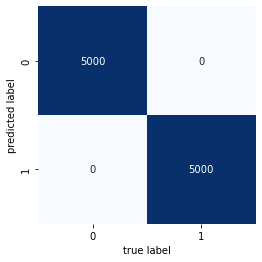

In [45]:
# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(2), yticklabels=range(2), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Plotando as regiões de decisão.

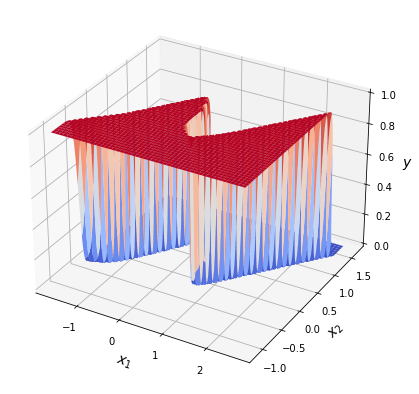

In [47]:
plotDecisionBoundary(gs,X[:,0],X[:,1],'mlptwomoons.png')